In [6]:
#SVM #LAB-4A
import numpy as np 
import pandas as pd 
from sklearn import svm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
iris = pd.read_csv('iris.csv') 

X = iris.iloc[:, :-1] 
y = iris.iloc[:, -1] 


scaler = StandardScaler() 
X = scaler.fit_transform(X) 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
clf = svm.SVC(kernel='rbf') 
clf.fit(X_train, y_train) 

y_pred = clf.predict(X_test) 
print('Accuracy:', accuracy) 

Accuracy: 1.0


In [7]:
#SVM #LAB-4B
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

clf = SVC(kernel='linear') 

clf.fit(X_train, y_train) 

predictions = clf.predict(X_test) 

accuracy = accuracy_score(y_test, predictions) 
print("Accuracy:", accuracy) 


Accuracy: 1.0


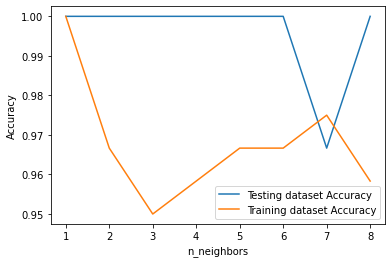

In [10]:
#LAb-5 K Nearest Neighbour Algorithem

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt 
irisData = load_iris() 
 
X = irisData.data 
y = irisData.target 

X_train, X_test, y_train, y_test = train_test_split( 
X, y, test_size = 0.2, random_state=42) 
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
 
    train_accuracy[i] = knn.score(X_train, y_train)


    test_accuracy[i] = knn.score(X_test, y_test) 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 


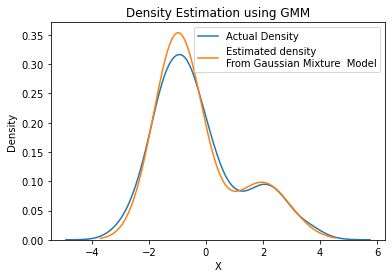

In [14]:
#Lab 6 Em algorithm
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture 
from scipy.stats import norm 
import seaborn as sns 

mu1, sigma1 = 2, 1 
mu2, sigma2 = -1, 0.8 
X1 = np.random.normal(mu1, sigma1, size=200) 
X2 = np.random.normal(mu2, sigma2, size=600) 
X = np.concatenate([X1, X2]) 
X = X.reshape(-1, 1) 

gmm = GaussianMixture(n_components=2, random_state=0) 
gmm.fit(X) 

x_grid = np.linspace(min(X), max(X), 1000).reshape(-1, 1) 
density_estimation = np.exp(gmm.score_samples(x_grid)) 
sns.kdeplot(X.ravel(), label="Actual Density")


plt.plot(x_grid, density_estimation, label='Estimated density\nFrom Gaussian Mixture  Model') 
plt.xlabel('X') 
plt.ylabel('Density') 
plt.title('Density Estimation using GMM') 
plt.legend() 
plt.show()


In [21]:
#Lab Program 7 the working of Naïve bayes classifier
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import CategoricalNB 
from sklearn.metrics import accuracy_score, classification_report 
import pandas as pd 

data = {'Feature1': [1, 2, 2, 1, 3, 3, 1, 2, 3, 3], 
 'Feature2': ['A', 'B', 'B', 'A', 'C', 'C', 'A', 'B', 'C', 'C'], 
 'Class': [0, 1, 1, 0, 1, 1, 0, 1, 1, 0]} 

df = pd.DataFrame(data) 
df_encoded = pd.get_dummies(df, columns=['Feature2']) 
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('Class', axis=1), df['Class'], 
                                                    test_size=0.2, random_state=42)

nb_classifier = CategoricalNB() 
nb_classifier.fit(X_train, y_train) 
y_pred = nb_classifier.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 

print(f'Accuracy: {accuracy:.2f}') 
print('Classification Report:') 
print(classification_report(y_test, y_pred)) 




Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



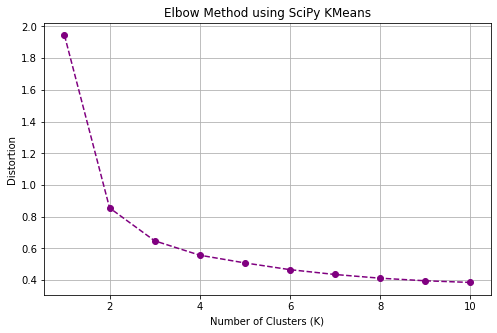

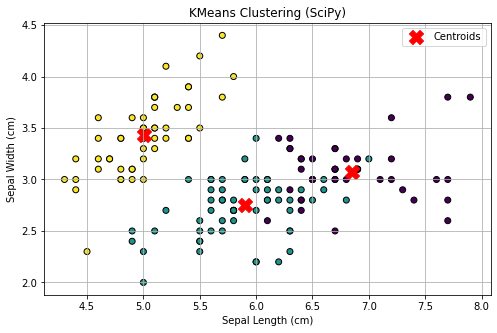

In [4]:
# Lab Program 8  k-Means algorithm


%matplotlib inline

import os
os.environ['OMP_NUM_THREADS'] = '1'

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, vq
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data


distortions = []
K_range = range(1, 11)

for k in K_range:
    centroids, distortion = kmeans(X.astype(float), k)
    distortions.append(distortion)


plt.figure(figsize=(8, 5))
plt.plot(K_range, distortions, marker='o', linestyle='--', color='purple')
plt.title('Elbow Method using SciPy KMeans')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()


centroids, _ = kmeans(X.astype(float), 3)
idx, _ = vq(X, centroids)


plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=idx, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (SciPy)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()
